<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_1_covid19_TS/Visualizing_Time_Series_Dataset_COVID_19_Data_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

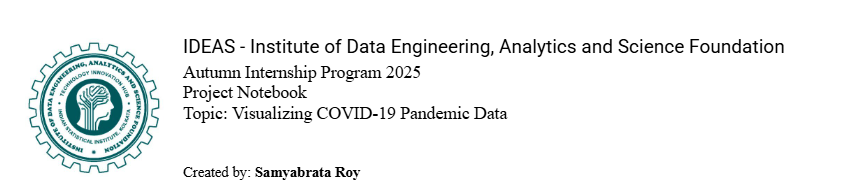

# Notebook: 1

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---



##📖 Introduction

When the COVID-19 pandemic began, the world was flooded with numbers — daily cases, recoveries, deaths, and later vaccinations. Looking at endless tables of figures wasn’t just boring, it was confusing.

But the moment those numbers were drawn into curves, bars, and maps, they started to make sense. Suddenly, we could see when cases were rising, where outbreaks were spreading, and how vaccinations were helping. The data wasn’t just numbers anymore — it was a story of how the world was coping.

That’s the real power of visualization. It’s not about making charts look pretty — it’s about making data human, so that anyone, not just experts, can understand what’s happening.

In this notebook, we’ll take COVID-19 data and learn step by step how to explore and visualize it using Python. Some of the code will be ready for you, while some parts will be left for you to try on your own. By the end, you’ll see how visualization can transform raw data into meaningful insights — and how those insights help us understand events that shape our lives.



---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily COVID-19 cases.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---
# New Section
## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:
# Replace with your Google Drive file ID which has public view access
file_id = "1Sj3Il94NXun9owedSWNGrxszjpAXTDEQ"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_covid = pd.read_csv(url)

  # Show first few rows
  print(df_covid.head())
except Exception as e:
    print(f"Error loading data: {e}")

  Date_reported Country_code     Country WHO_region  New_cases  \
0    2020-01-04           AI    Anguilla        AMR        NaN   
1    2020-01-04           AZ  Azerbaijan        EUR        NaN   
2    2020-01-04           BD  Bangladesh       SEAR        0.0   
3    2020-01-04           BB    Barbados        AMR        NaN   
4    2020-01-04           BR      Brazil        AMR        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         0.0                  0  
3                 0         NaN                  0  
4                 0         NaN                  0  


## Subsetting the Dataset for Analysis

To simplify the study, I will take a subset of the dataset containing only the most relevant columns:

- **Date_reported**
- **Country**
- **WHO_region**
- **New_cases**
- **New_deaths**
- **Cumulative_cases**
- **Cumulative_deaths**

This subset will allow me to focus on the essential variables required for exploratory data analysis (EDA).  


In [ ]:
# Subsetting the dataset for analysis
subset_cols = [
    "Date_reported",
    "Country",
    "WHO_region",
    "New_cases",
    "New_deaths",
    "Cumulative_cases",
    "Cumulative_deaths"
]

df_covid_subset = df_covid[subset_cols].copy()

### Date Trimming  

Since our dataset contains records over a wide range of dates, we may not always need the full timeline for analysis.  
To make the dataset more relevant and manageable, we will **filter the data based on a specific date range**.  

This allows us to:  
- Focus on a particular period of interest (e.g., second wave, third wave, or vaccination drive).  
- Reduce noise from irrelevant dates.  
- Improve the clarity of visualizations by narrowing down to meaningful time windows.  

By trimming the data to the required start and end dates, we ensure that our analysis stays **targeted and insightful**.  

#### Here start date is chosen as 1st of Mar 2020 & end date is choosen as 31st of Aug 2023 as according to WHO, they stopped requiring daily basis data reporting since August 2023

In [ ]:
# Assuming your dataframe is named df and Date_reported is already in datetime format
df_covid_subset['Date_reported'] = pd.to_datetime(df_covid_subset['Date_reported'])

# Define the date range
start_date = "2020-03-01"
end_date = "2023-08-31"

# Filter the rows
df_covid_trimmed = df_covid_subset[(df_covid_subset['Date_reported'] >= start_date) & (df_covid_subset['Date_reported'] <= end_date)]

# Check subset
print("Subset shape:", df_covid_trimmed.shape)
print(df_covid_trimmed.head())
print(df_covid_trimmed.tail())

Subset shape: (306960, 7)
      Date_reported  Country WHO_region  New_cases  New_deaths  \
13680    2020-03-01    Yemen        EMR        NaN         NaN   
13681    2020-03-01  Uruguay        AMR        NaN         NaN   
13682    2020-03-01  Ukraine        EUR        NaN         NaN   
13683    2020-03-01  Tunisia        EMR        NaN         NaN   
13684    2020-03-01    Sudan        EMR        NaN         NaN   

       Cumulative_cases  Cumulative_deaths  
13680                 0                  0  
13681                 0                  0  
13682                 0                  0  
13683                 0                  0  
13684                 0                  0  
       Date_reported                           Country WHO_region  New_cases  \
320635    2023-08-31                        Tajikistan        EUR        NaN   
320636    2023-08-31                         Sri Lanka       SEAR        0.0   
320637    2023-08-31                   Solomon Islands        WPR  

## EDA including visualization

In the EDA, I will perform the following visualizations:

1. **Line plots for daily cases in the top 5 affected countries**  
   (Initially with Matplotlib to highlight limitations, then with Plotly for interactivity).

2. **Stacked bar chart for new cases vs new deaths by WHO region**  
   (To show region was more saceptable to COVID-19).  

3. **Heatmap of case intensity by date and region**  
   (To visualize hotspots and the spread over time).  




---


### Plot 1

This code identifies the top 5 countries with the highest cumulative COVID-19 cases, filters their data, and then plots line graphs of daily new cases over time for each of those countries using Matplotlib.

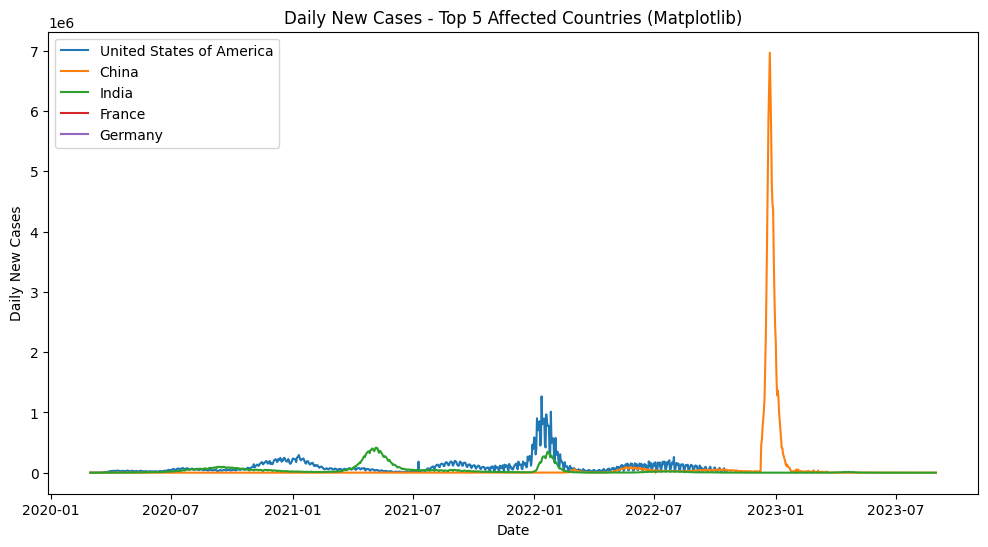

In [ ]:
# 1. Line plots for daily cases in the top 5 affected countries

# Find top 5 affected countries by cumulative cases
top5_countries = (
    df_covid_trimmed.groupby("Country")["Cumulative_cases"]
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data
df_top5 = df_covid_trimmed[df_covid_trimmed["Country"].isin(top5_countries)]

# Plotting the data based on daily new cases
plt.figure(figsize=(12,6))
for country in top5_countries:
    country_data = df_top5[df_top5["Country"] == country]
    plt.plot(country_data["Date_reported"], country_data["New_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.title("Daily New Cases - Top 5 Affected Countries (Matplotlib)")
plt.legend()
plt.show()


**Note:** On the y-axis, `1e6` means **1 million (1,000,000)** and `1e8` means **100 million (100,000,000)**.


---



## Question:
What we should have done instade to plot the top 5 countries least affected by COVID-19?

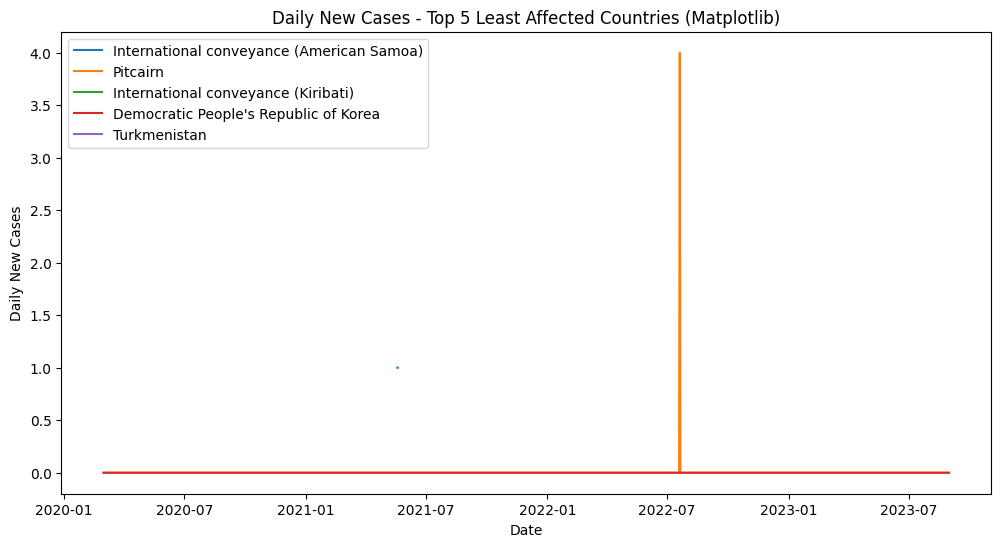

In [ ]:
# 1. Line plots for daily cases in the top 5 least affected countries

# Find top 5 least affected countries by cumulative cases
top5least_countries = (
    df_covid_trimmed.groupby("Country")["Cumulative_cases"]
    .max()
    .sort_values(ascending=False)
    .tail(5)
    .index
)
df_top5 = df_covid_trimmed[df_covid_trimmed["Country"].isin(top5least_countries)]

# Plotting the data based on daily new cases
plt.figure(figsize=(12,6))
for country in top5least_countries:
    country_data = df_top5[df_top5["Country"] == country]
    plt.plot(country_data["Date_reported"], country_data["New_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.title("Daily New Cases - Top 5 Least Affected Countries (Matplotlib)")
plt.legend()
plt.show()


### Task

Create a line plot which shows daily global new cases as one dramatic mountain shape

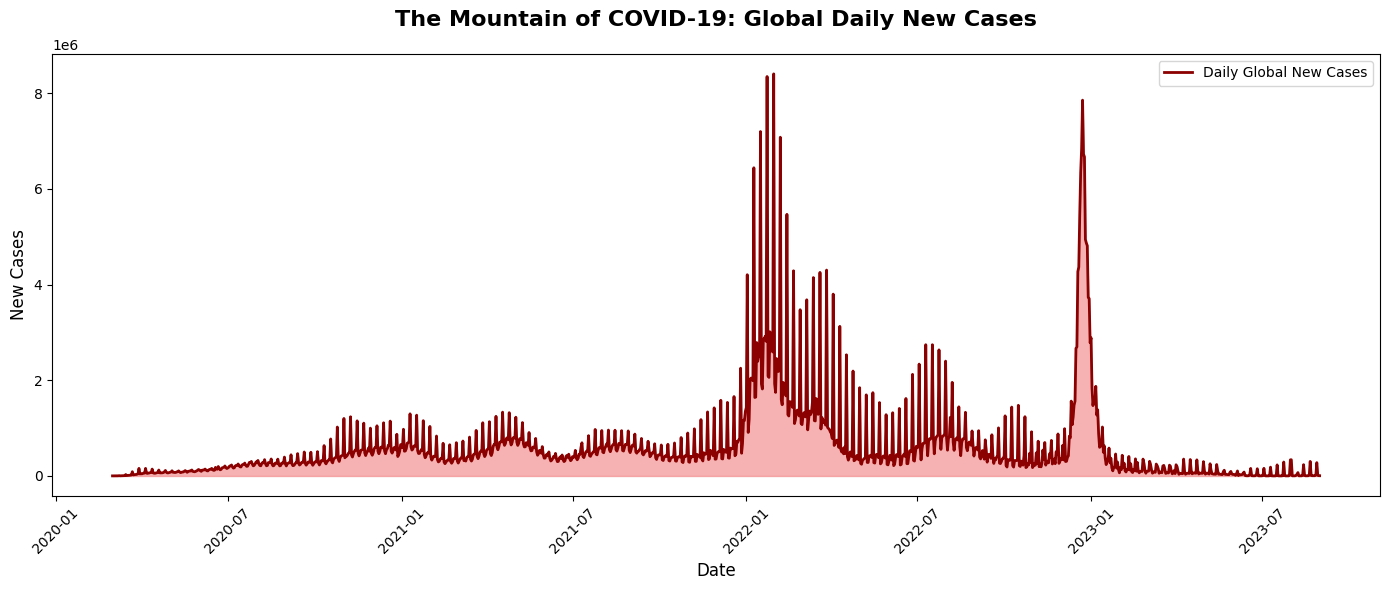

In [ ]:
# Aggregate global daily cases
daily_global_cases = df_covid_trimmed.groupby("Date_reported")["New_cases"].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_global_cases["Date_reported"], daily_global_cases["New_cases"],
         color="darkred", linewidth=2, label="Daily Global New Cases")

plt.fill_between(daily_global_cases["Date_reported"],
                 daily_global_cases["New_cases"],
                 color="lightcoral", alpha=0.6)

# Title & labels
plt.title("The Mountain of COVID-19: Global Daily New Cases", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Date", fontsize=12)
plt.ylabel("New Cases", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



---

### Plot 2

This code aggregates COVID-19 new cases and deaths by quarter and visualizes them using a stacked bar chart, where deaths are shown on top of cases. It highlights the timeline of the pandemic’s impact, making it easier to compare peaks and proportions across different periods.

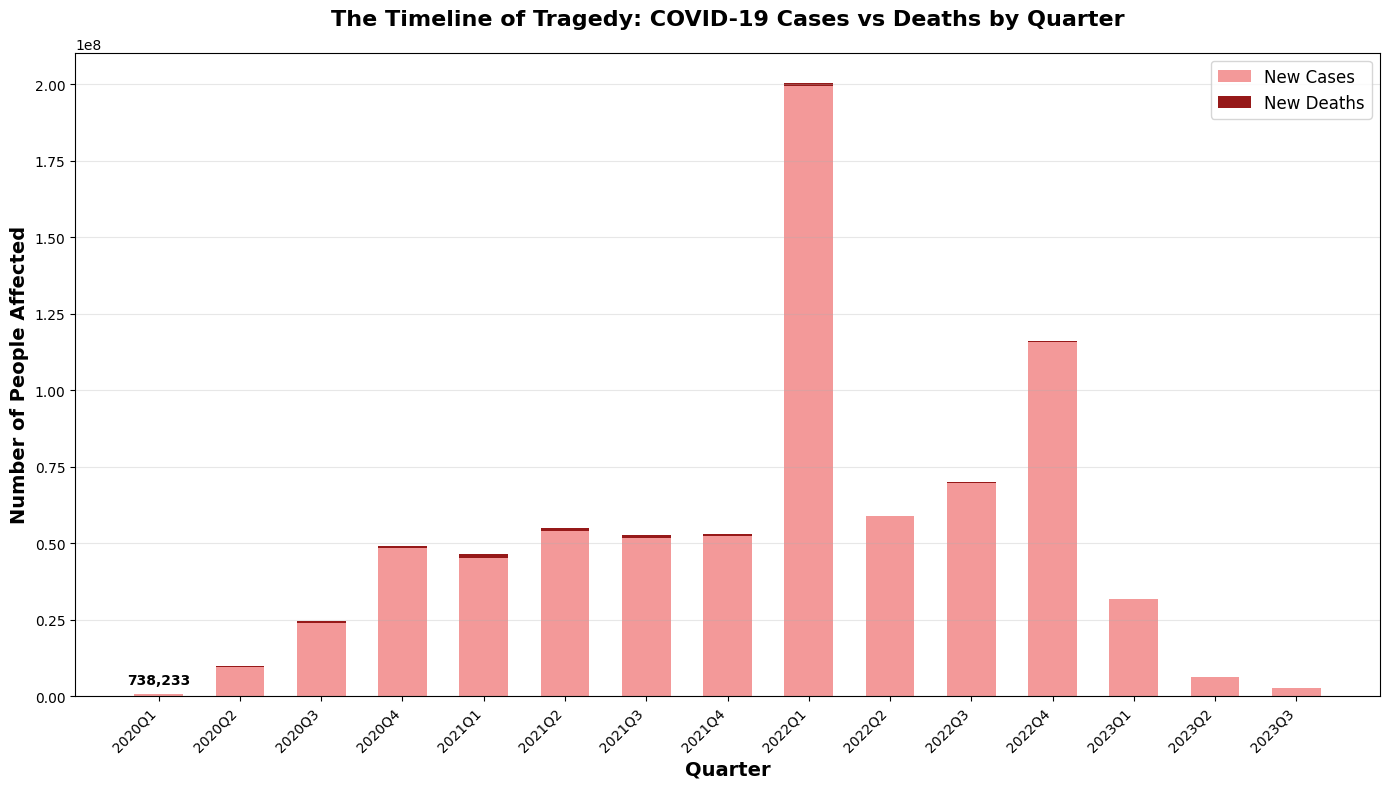

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Cases vs Deaths Over Time (Quarterly)
df_copy = df_covid_trimmed.copy()
df_copy['Quarter'] = df_copy['Date_reported'].dt.to_period('Q')

# Aggregate by quarter
quarterly_data = df_copy.groupby('Quarter').agg({'New_cases': 'sum', 'New_deaths': 'sum'}).reset_index()

# Convert period to string for plotting
quarterly_data['Quarter_str'] = quarterly_data['Quarter'].astype(str)
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.6
cases_bars = ax.bar(quarterly_data['Quarter_str'], quarterly_data['New_cases'],
                       width, label='New Cases', color='lightcoral', alpha=0.8)
deaths_bars = ax.bar(quarterly_data['Quarter_str'], quarterly_data['New_deaths'],
                        width, bottom=quarterly_data['New_cases'],
                        label='New Deaths', color='darkred', alpha=0.9)
ax.set_title('The Timeline of Tragedy: COVID-19 Cases vs Deaths by Quarter',
                fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of People Affected', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
for i, (cases, deaths) in enumerate(zip(quarterly_data['New_cases'], quarterly_data['New_deaths'])):
  total = cases + deaths
  ax.annotate(f'{total:,.0f}',
                xy=(i, total),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
                fontweight='bold', fontsize=10)

  plt.tight_layout()
  plt.show()
  max_quarter = quarterly_data.loc[quarterly_data['New_cases'].idxmax(), 'Quarter_str']
  max_cases = quarterly_data['New_cases'].max()



**Note:** On the y-axis, `1e6` means **1 million (1,000,000)** and `1e8` means **100 million (100,000,000)**.


---



### Task

Convert the above chart to double bar chart with the same data

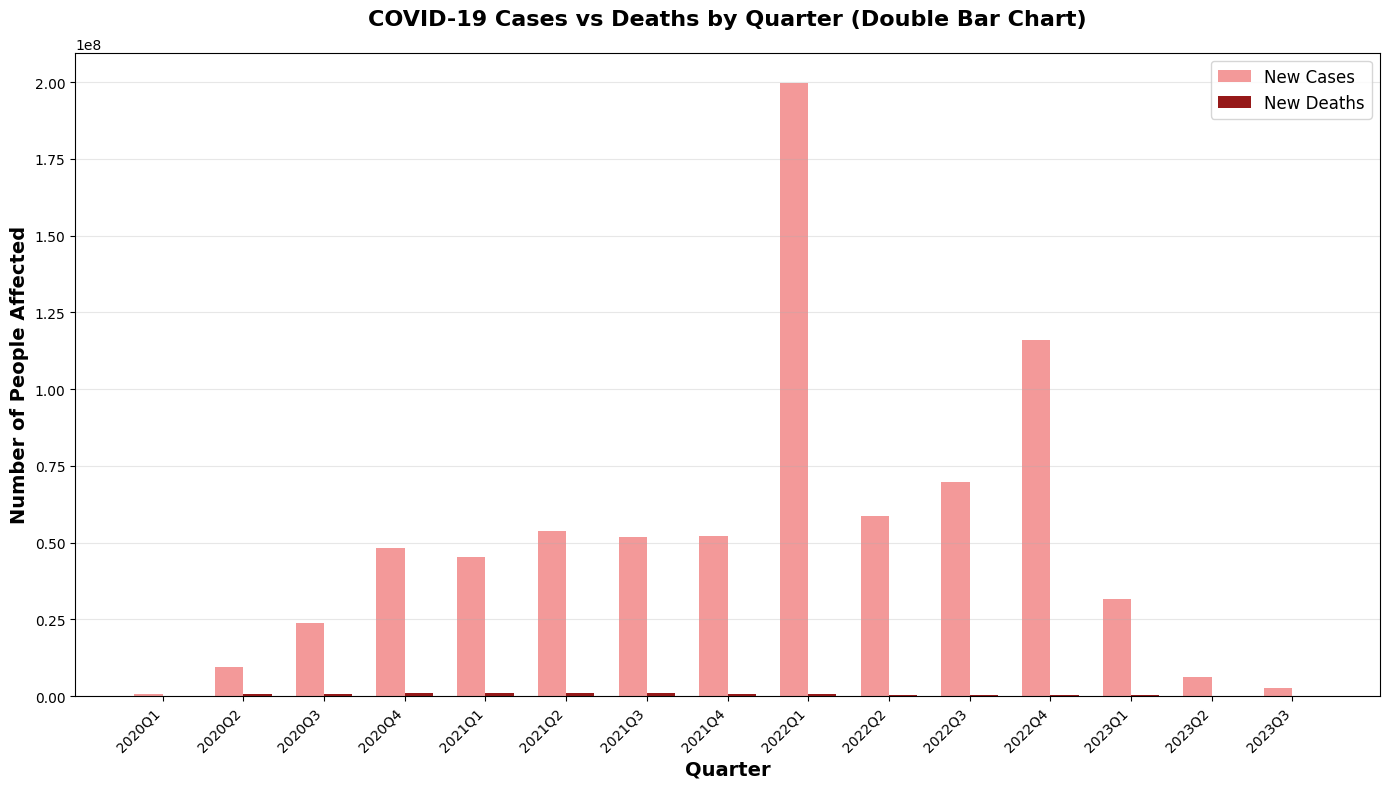

In [ ]:
# Double Bar Chart
df_copy = df_covid_trimmed.copy()
df_copy['Quarter'] = df_copy['Date_reported'].dt.to_period('Q')
quarterly_data = df_copy.groupby('Quarter').agg({
    'New_cases': 'sum',
    'New_deaths': 'sum'
}).reset_index()
quarterly_data['Quarter_str'] = quarterly_data['Quarter'].astype(str)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(quarterly_data['Quarter_str']))
width = 0.35
cases_bars = ax.bar(x - width/2, quarterly_data['New_cases'],
                    width, label='New Cases', color='lightcoral', alpha=0.8)
deaths_bars = ax.bar(x + width/2, quarterly_data['New_deaths'],
                     width, label='New Deaths', color='darkred', alpha=0.9)
ax.set_title('COVID-19 Cases vs Deaths by Quarter (Double Bar Chart)',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of People Affected', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(quarterly_data['Quarter_str'], rotation=45, ha='right')
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Task

Construct a pie chart which Shows just top 10 countries mostly affected by COVID-19 ( by cummulative deaths)

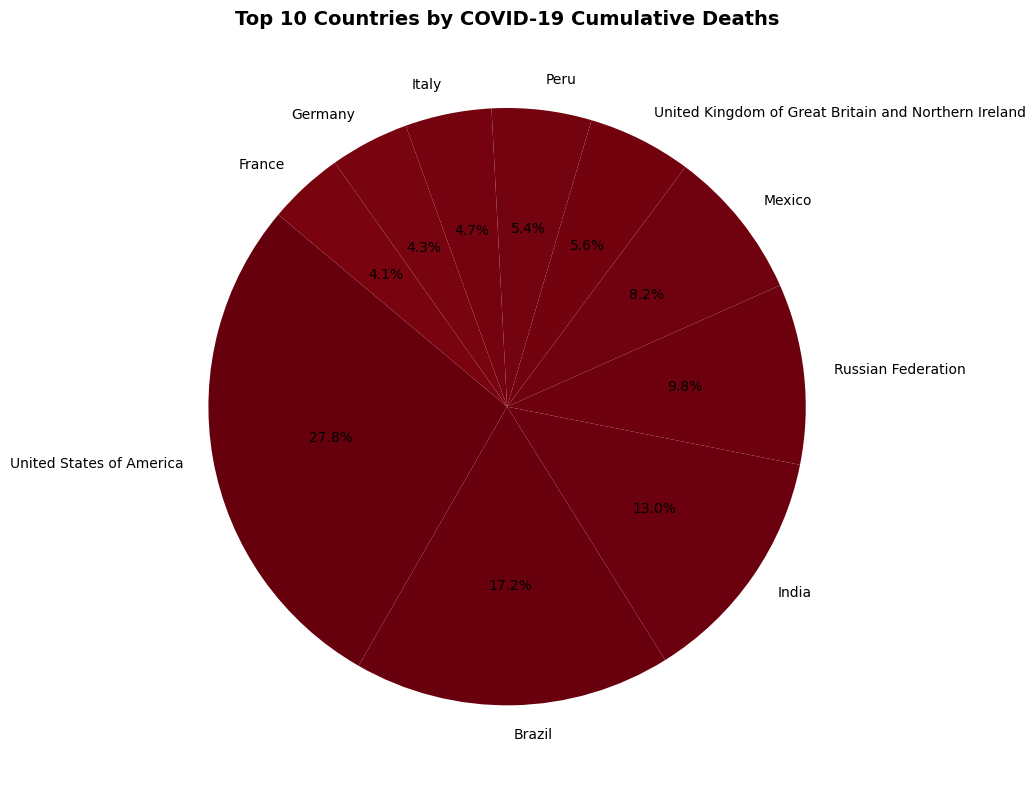

In [ ]:
# Aggregate total cumulative deaths by country
country_deaths = df_covid_trimmed.groupby("Country")["Cumulative_deaths"].max().reset_index()
top10_deaths = country_deaths.sort_values(by="Cumulative_deaths", ascending=False).head(10)

# Pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    top10_deaths["Cumulative_deaths"],
    labels=top10_deaths["Country"],
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Reds_r(range(10))
)

plt.title("Top 10 Countries by COVID-19 Cumulative Deaths", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()



---

### Plot 3

We aggregated monthly COVID-19 new cases by WHO region and visualized them using a heatmap.
This highlights when and where case surges were most intense across different regions.

/tmp/ipython-input-3601044939.py:34: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


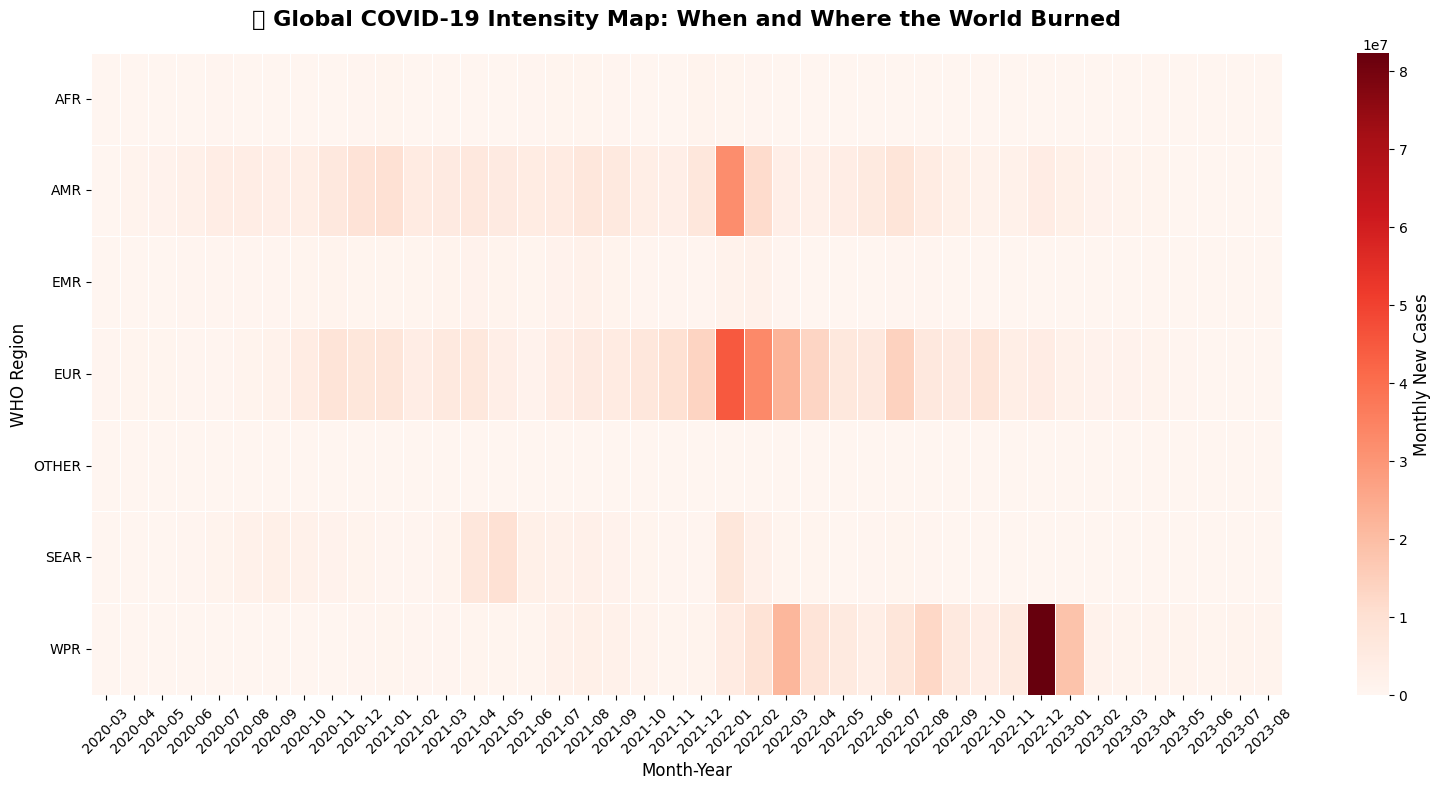

In [ ]:
df_monthly = df_covid_trimmed.copy()
df_monthly['Month_Year'] = df_monthly['Date_reported'].dt.to_period('M')
heatmap_data = df_monthly.groupby(['WHO_region', 'Month_Year'])['New_cases'].sum().reset_index()
heatmap_pivot = heatmap_data.pivot(index='WHO_region', columns='Month_Year', values='New_cases')
heatmap_pivot = heatmap_pivot.fillna(0)

# Create the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_pivot,
            cmap='Reds',
            cbar_kws={'label': 'Monthly New Cases'},
            linewidths=0.5,
            linecolor='white')

plt.title('Global COVID-19 Intensity Map: When and Where the World Burned',
    fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('WHO Region', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()

### Task:

1) Visualize another heatmap showing quaterly new deaths' intensity by regions.
2) Visualize a heatmap showing monthly new cases' intensity by top 10 countries

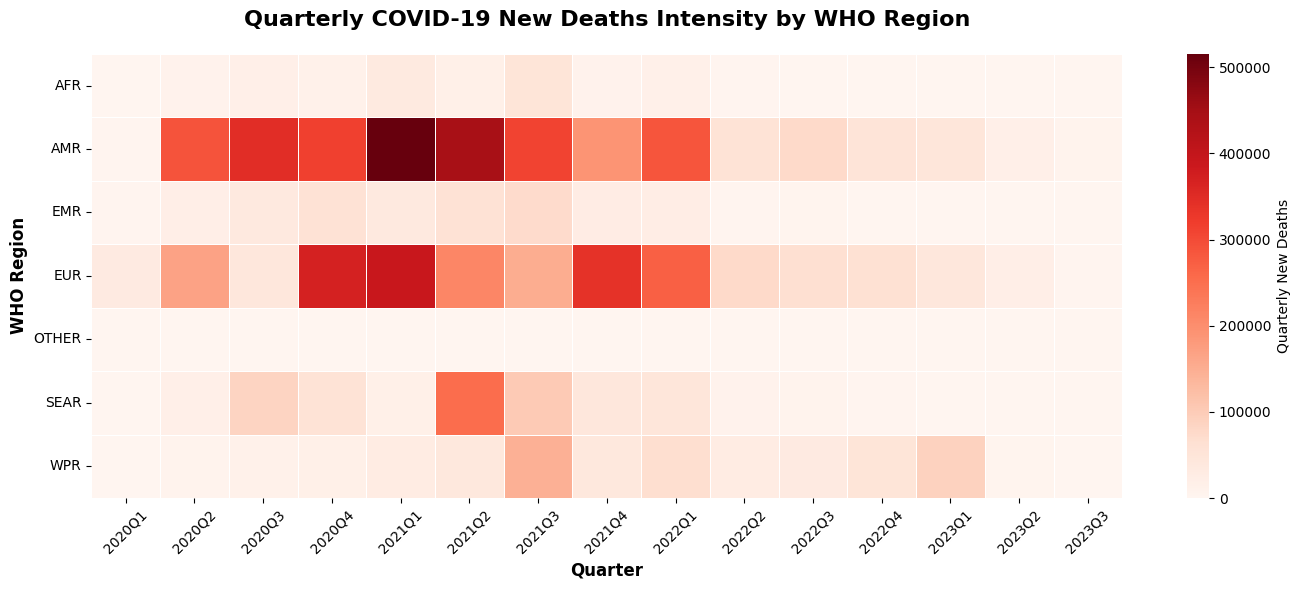

In [ ]:
df_q = df_covid_trimmed.copy()
df_q["Quarter"] = df_q["Date_reported"].dt.to_period("Q")
heatmap_data = df_q.groupby(["WHO_region", "Quarter"])["New_deaths"].sum().reset_index()
heatmap_pivot = heatmap_data.pivot(index="WHO_region", columns="Quarter", values="New_deaths").fillna(0)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_pivot,
    cmap="Reds",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Quarterly New Deaths"}
)

plt.title("Quarterly COVID-19 New Deaths Intensity by WHO Region", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Quarter", fontsize=12, fontweight="bold")
plt.ylabel("WHO Region", fontsize=12, fontweight="bold")

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



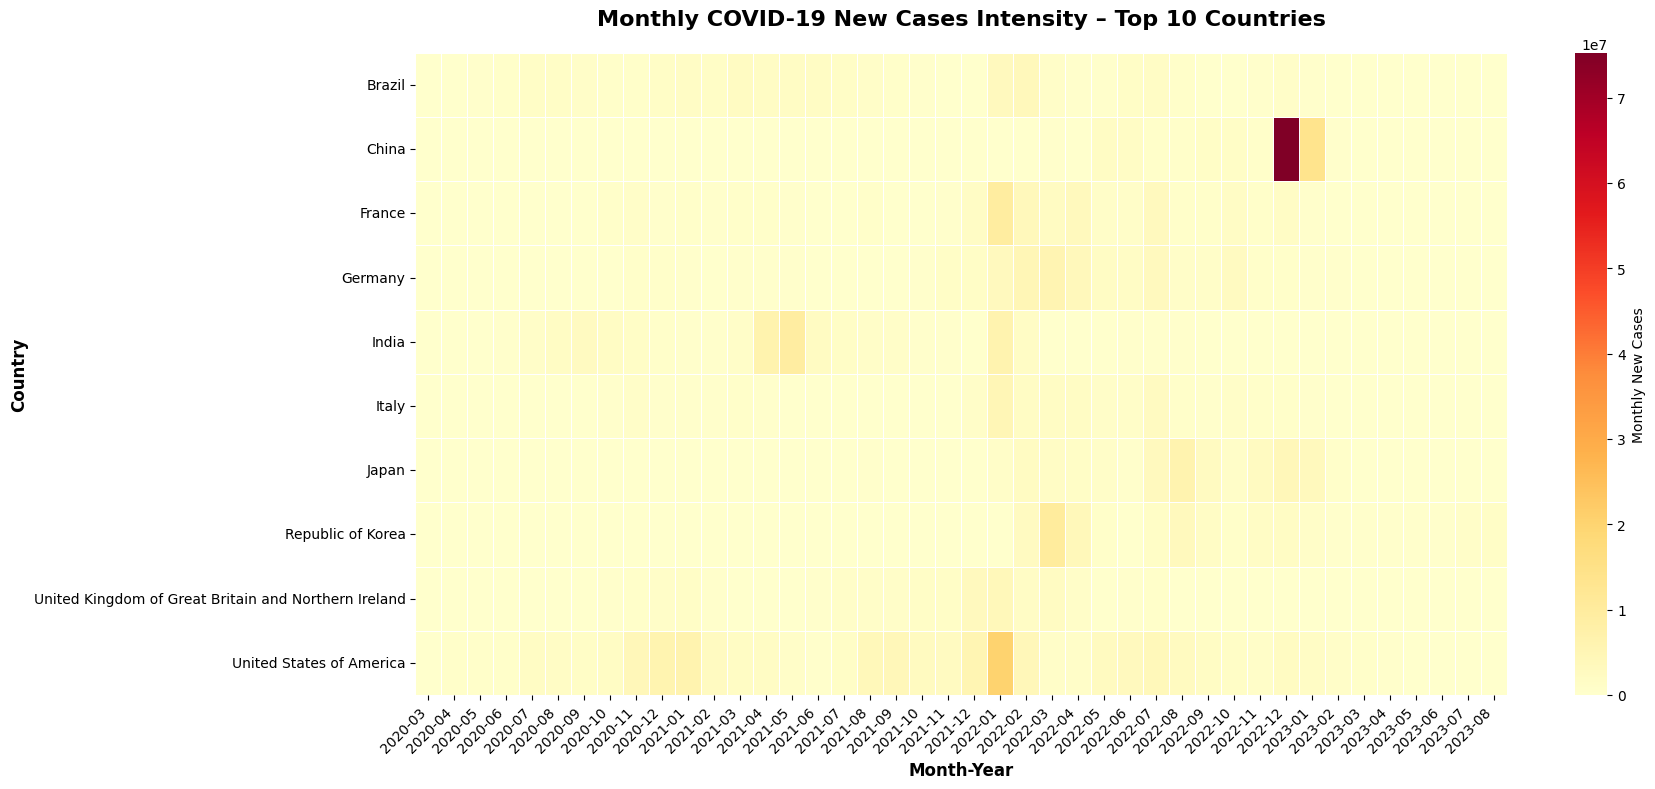

In [ ]:


df_m = df_covid_trimmed.copy()
df_m["Month_Year"] = df_m["Date_reported"].dt.to_period("M")
top10_countries = (
    df_m.groupby("Country")["Cumulative_cases"].max()
    .sort_values(ascending=False)
    .head(10)
    .index
)
df_top10 = df_m[df_m["Country"].isin(top10_countries)]
heatmap_data = (
    df_top10.groupby(["Country", "Month_Year"])["New_cases"]
    .sum()
    .reset_index()
)
heatmap_pivot = heatmap_data.pivot(index="Country", columns="Month_Year", values="New_cases").fillna(0)

# heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(
    heatmap_pivot,
    cmap="YlOrRd",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Monthly New Cases"}
)

plt.title("Monthly COVID-19 New Cases Intensity – Top 10 Countries", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Month-Year", fontsize=12, fontweight="bold")
plt.ylabel("Country", fontsize=12, fontweight="bold")

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



---



## Interactive COVID-19 Dashboard with Plotly

In this section, we build an interactive dashboard to explore the COVID-19 dataset using **Plotly**.  
The dashboard allows dynamic filtering, visualization, and comparison of different trends such as  
- **Daily New Cases and Deaths** across regions and countries  
- **Cumulative trends** over time  
- **Stacked bar charts** and **line plots** for deeper insights  

This interactive approach provides users with the flexibility to investigate the data from multiple perspectives,  
making the analysis more engaging and intuitive compared to static charts.


###  About Plotly

**Plotly** is a powerful, open-source Python library that allows us to create **interactive and publication-quality visualizations**—like line plots, bar charts, heatmaps, and more—right inside our notebooks. It enables users to **zoom, hover, and explore data dynamically**, making data storytelling both engaging and intuitive.


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go



# ---- 1. Line Chart: Global New Cases Over Time ----
fig_cases = px.line(
    df_covid_trimmed.groupby('Date_reported', as_index=False).sum(),
    x="Date_reported",
    y="New_cases",
    title="Global New COVID-19 Cases Over Time"
)

# ---- 2. Line Chart: Global New Deaths Over Time ----
fig_deaths = px.line(
    df_covid_trimmed.groupby('Date_reported', as_index=False).sum(),
    x="Date_reported",
    y="New_deaths",
    title="Global New COVID-19 Deaths Over Time",
    color_discrete_sequence=["red"]
)

# ---- 3. Stacked Bar Chart: New Cases vs New Deaths grouped by WHO Region ----
region_grouped = df_covid_trimmed.groupby(['Date_reported', 'WHO_region'], as_index=False)[['New_cases', 'New_deaths']].sum()

fig_stacked = go.Figure()
fig_stacked.add_trace(go.Bar(
    x=region_grouped["Date_reported"],
    y=region_grouped["New_cases"],
    name="New Cases",
    marker_color="blue"
))
fig_stacked.add_trace(go.Bar(
    x=region_grouped["Date_reported"],
    y=region_grouped["New_deaths"],
    name="New Deaths",
    marker_color="red"
))

fig_stacked.update_layout(
    barmode="stack",
    title="New Cases vs New Deaths (Stacked) by WHO Region",
    xaxis_title="Date",
    yaxis_title="Count",
)

# ---- 4. Choropleth Map: Total Cases by Country ----
country_grouped = df_covid_trimmed.groupby('Country', as_index=False)['Cumulative_cases'].max()

fig_map = px.choropleth(
    country_grouped,
    locations="Country",
    locationmode="country names",
    color="Cumulative_cases",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title="Global Distribution of Total COVID-19 Cases"
)

# ---- Display all interactive charts ----
fig_cases.show()
fig_deaths.show()
fig_stacked.show()
fig_map.show()


## Question

Interpret the above map shown.

---



#1.Line Chart – Global New COVID-19 Cases Over Time

This chart illustrates the trajectory of daily newly reported COVID-19 cases worldwide throughout the course of the pandemic. The overall pattern resembles successive waves of infection, with distinct peaks corresponding to major global surges.

Several notable trends can be observed:

The first significant global wave occurred around mid-2020, following the initial spread of the virus.

A subsequent Delta-driven surge emerged in mid-2021, producing a marked increase in case numbers across multiple regions.

The Omicron variant, detected in late 2021, precipitated the largest and sharpest spike in global cases, with record-breaking transmission levels extending into early 2022.

 From early 2023 onward, the curve demonstrates a marked decline and relative flattening, reflecting substantially lower numbers of reported new cases worldwide


# 2. Line Chart – Global New COVID-19 Deaths Over Time
What it shows: Daily global deaths reported.

Interpretation:

Deaths tend to lag behind cases (peaks come a few weeks later).

The death curve is smoother than the cases curve, because fatalities accumulate more steadily.

Major death waves correspond to:

Early 2020 outbreaks (Italy, US, Brazil, India).

Delta wave (2021) – highest global fatality wave.

During Omicron (2022), deaths rose but were proportionally much lower compared to cases → vaccines and immunity reduced severity.

Like cases, deaths decline sharply by mid-2023.

# 3. Stacked Bar Chart – New Cases vs. New Deaths by WHO Region
What it shows: Breakdown of cases and deaths across WHO regions (AFRO, EURO, SEARO, PAHO, EMRO, WPRO).

Interpretation:

You’ll see different color bands stacked, representing which regions contributed most to global totals at different times.

Europe & Americas dominate much of the early pandemic (biggest share of global cases).

South-East Asia (SEARO) shows sharp spikes during the Delta wave (especially India in 2021).

Africa (AFRO) generally contributes a smaller share, but spikes are visible.

This chart helps see regional dynamics — for example, Europe had multiple winter waves, while Asia had concentrated Delta and Omicron spikes.

# 4. Choropleth Map – Global Distribution of Total COVID-19 Cases (Latest Date)
What it shows: Cumulative total cases reported by country, as of the dataset’s last date (Aug 31, 2023).

Interpretation:

Darker colors = higher total reported cases.

United States, India, Brazil, Russia, and European countries are darkest → among the most affected globally.

Africa shows lighter shading overall → partly fewer cases, but also reflects lower testing/reporting capacity.

Many smaller or less populated countries are pale, showing relatively few total cases.




---

#Assignment:

Find a similart dataset (e.g. `Ebola | 2014-2016 | Western Africa Ebola Outbreak` ) and extract a similar visualization out of it.





checkout:  `https://www.kaggle.com/datasets/imdevskp/ebola-outbreak-20142016-complete-dataset`

# Introduction to Ebola Dataset
The Western African Ebola virus epidemic (2013–2016) represents the largest and most devastating outbreak of Ebola virus disease (EVD) in recorded history. The epidemic was first identified in December 2013 in Guinea, from where it rapidly disseminated to Liberia and Sierra Leone, with additional limited outbreaks documented in other countries. Beyond its immediate health consequences, the epidemic precipitated profound socioeconomic disruption, straining fragile healthcare systems and undermining regional stability.

Epidemiological assessments reported a high case fatality rate (CFR), with mortality among hospitalized patients ranging between 57–59%. By the end of the outbreak, a total of 28,616 suspected, probable, and confirmed cases had been reported, including 11,310 deaths, yielding an overall CFR of approximately 40%. These figures highlight both the scale of transmission and the severe clinical outcomes associated with the epidemic, underscoring its significance as a global public health emergency.

In [6]:
import pandas as pd

file_id = "1uOBPwd2nmpNwOf4sBatvUtBIB-Q-7vuF"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)
print(df.head())


        Country        Date  \
0        Guinea  2014-08-29   
1       Nigeria  2014-08-29   
2  Sierra Leone  2014-08-29   
3       Liberia  2014-08-29   
4  Sierra Leone  2014-09-05   

   Cumulative no. of confirmed, probable and suspected cases  \
0                                              648.0           
1                                               19.0           
2                                             1026.0           
3                                             1378.0           
4                                             1261.0           

   Cumulative no. of confirmed, probable and suspected deaths  
0                                              430.0           
1                                                7.0           
2                                              422.0           
3                                              694.0           
4                                              491.0           


In [7]:
#changing column names
df = df.rename(columns={
    "Cumulative no. of confirmed, probable and suspected cases": "Sus_cases",
    "Cumulative no. of confirmed, probable and suspected deaths": "Sus_death"
})
print(df.head())

        Country        Date  Sus_cases  Sus_death
0        Guinea  2014-08-29      648.0      430.0
1       Nigeria  2014-08-29       19.0        7.0
2  Sierra Leone  2014-08-29     1026.0      422.0
3       Liberia  2014-08-29     1378.0      694.0
4  Sierra Leone  2014-09-05     1261.0      491.0


# Plotting a Line Plot

Index(['Sierra Leone', 'Liberia', 'Guinea', 'Nigeria', 'Mali'], dtype='object', name='Country')


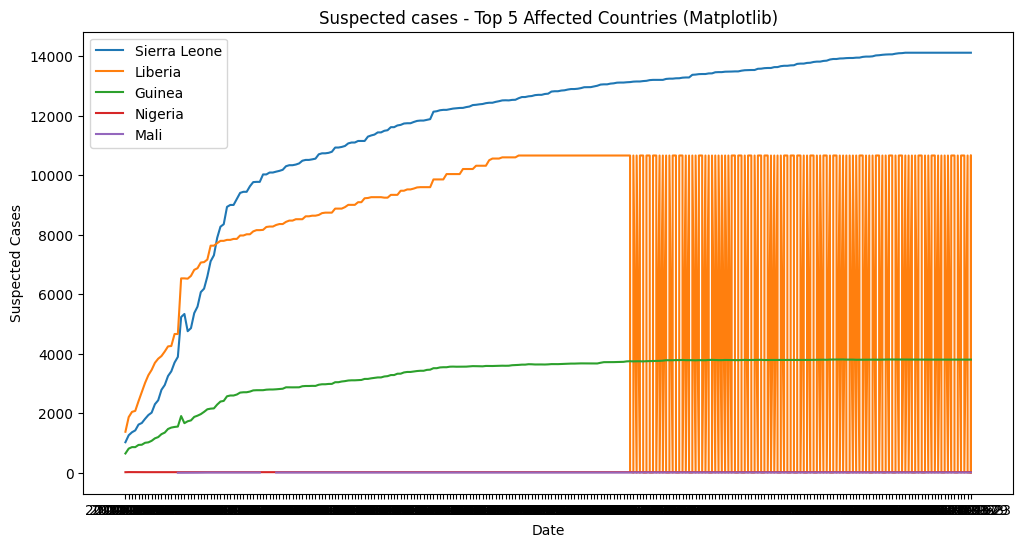

In [8]:
#line plot----------------------------------------------------------------------------------------------------------------------------------
top5_countries = (
    df.groupby("Country")["Sus_cases"]
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)
print(top5_countries)

# Plotting the data based on daily new cases
plt.figure(figsize=(12,6))
for country in top5_countries:
    country_data = df[df["Country"] == country]
    plt.plot(country_data["Date"], country_data["Sus_cases"], label=country)


plt.xlabel("Date")
plt.ylabel("Suspected Cases")
plt.title("Suspected cases - Top 5 Affected Countries (Matplotlib)")
plt.legend()
plt.show()

# Plot 2

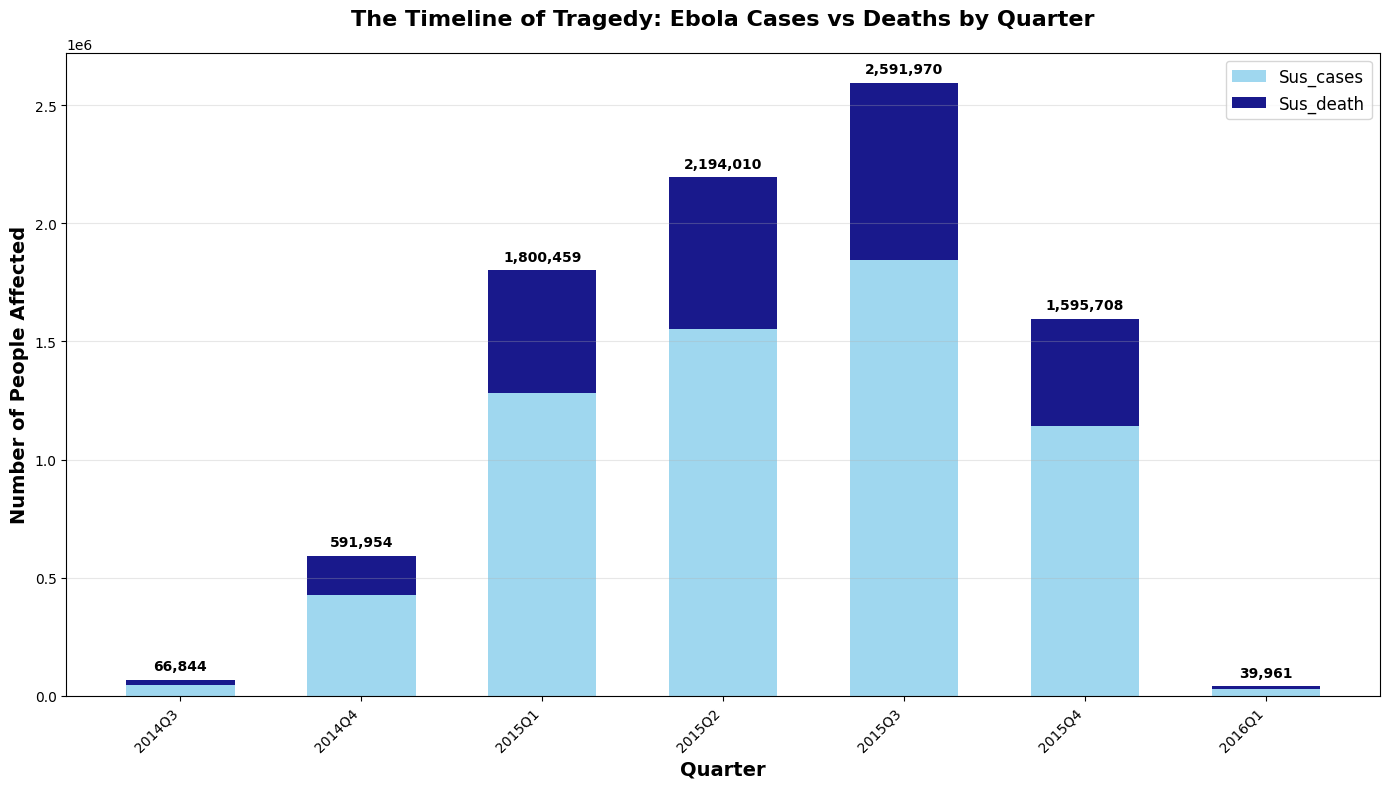

The quarter with the highest suspected cases is 2015Q3 with 1,846,580.0 cases.


In [10]:
# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.6
cases_bars = ax.bar(
    quarterly_data['Quarter_str'],
    quarterly_data['Sus_cases'],
    width,
    label='Sus_cases',
    color='skyblue',   # light blue for cases
    alpha=0.8
)
deaths_bars = ax.bar(
    quarterly_data['Quarter_str'],
    quarterly_data['Sus_death'],
    width,
    bottom=quarterly_data['Sus_cases'],
    label='Sus_death',
    color='navy',      # dark blue for deaths
    alpha=0.9
)

# Customize the plot
ax.set_title('The Timeline of Tragedy: Ebola Cases vs Deaths by Quarter',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of People Affected', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)

plt.xticks(rotation=45, ha='right')

# Add annotations
for i, (cases, deaths) in enumerate(zip(quarterly_data['Sus_cases'], quarterly_data['Sus_death'])):
    total = cases + deaths
    ax.annotate(f'{total:,.0f}',
                xy=(i, total),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
                fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

max_quarter = quarterly_data.loc[quarterly_data['Sus_cases'].idxmax(), 'Quarter_str']
max_cases = quarterly_data['Sus_cases'].max()
print(f"The quarter with the highest suspected cases is {max_quarter} with {max_cases:,} cases.")


# Plot Heatmap

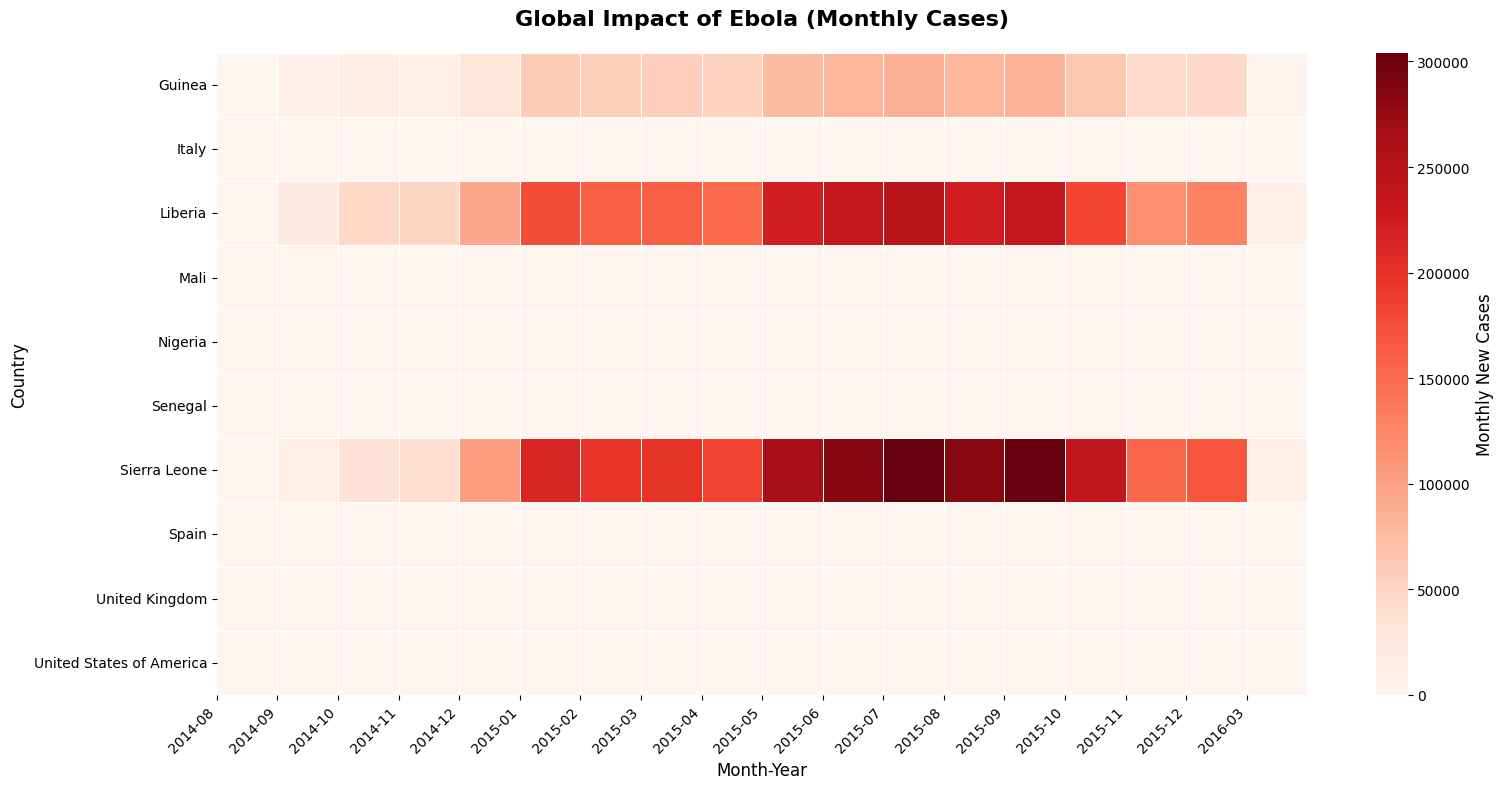

In [11]:
#HeatMap---------------------------------------------------------------------
df_monthly = df.copy()
df_monthly['Date'] = pd.to_datetime(df_monthly['Date'])
df_monthly['Month_Year'] = df_monthly['Date'].dt.to_period('M')

heatmap_data = (
    df_monthly.groupby(['Country', 'Month_Year'])['Sus_cases']
    .sum()
    .reset_index()
)

heatmap_pivot = heatmap_data.pivot(
    index='Country',
    columns='Month_Year',
    values='Sus_cases'
).fillna(0)

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(
    heatmap_pivot,
    cmap='Reds',
    cbar_kws={'label': 'Monthly New Cases'},
    linewidths=0.5,
    linecolor='white'
)

plt.title('Global Impact of Ebola (Monthly Cases)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Country', fontsize=12)

plt.xticks(
    ticks=range(len(heatmap_pivot.columns)),
    labels=[str(p) for p in heatmap_pivot.columns],  # Convert Period to string (e.g. "2014-08")
    rotation=45,
    ha='right'
)
plt.yticks(rotation=0)
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()

# Plotting using Plotly

In [12]:
#plotly__________________________________________________________________________________________________
df["Date"] = pd.to_datetime(df["Date"])

# Line Chart: Global Suspected Cases Over Time
global_cases = df.groupby("Date")[["Sus_cases"]].sum().reset_index()

fig_cases = px.line(
    global_cases,
    x="Date",
    y="Sus_cases",
    title="Global Suspected Ebola Cases Over Time"
)

# Line Chart: Global Suspected Deaths Over Time
global_deaths = df.groupby("Date")[["Sus_death"]].sum().reset_index()

fig_deaths = px.line(
    global_deaths,
    x="Date",
    y="Sus_death",
    title="Global Suspected Ebola Deaths Over Time",
    color_discrete_sequence=["red"]
)

# Stacked Bar Chart: Suspected Cases vs Deaths by Country
region_grouped = df.groupby(["Date", "Country"])[["Sus_cases", "Sus_death"]].sum().reset_index()

fig_stacked = go.Figure()
fig_stacked.add_trace(go.Bar(
    x=region_grouped["Date"],
    y=region_grouped["Sus_cases"],
    name="Suspected Cases",
    marker_color="blue"
))
fig_stacked.add_trace(go.Bar(
    x=region_grouped["Date"],
    y=region_grouped["Sus_death"],
    name="Suspected Deaths",
    marker_color="red"
))

fig_stacked.update_layout(
    barmode="stack",
    title="Suspected Cases vs Suspected Deaths by Country",
    xaxis_title="Date",
    yaxis_title="Count",
)

# Display charts
fig_cases.show()
fig_deaths.show()
fig_stacked.show()





